In [76]:
import numpy as npS
import matplotlib.pyplot as plt
import math as math

Multiple variable linear regression equation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
Cost function with multiple variables:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
Gradient descent with multiple variables:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set
* $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ and $\frac{\partial J(\mathbf{w},b)}{\partial b}$ are gradients


In [108]:
def calculate_gradient(X, y, w, b ):
    """
    Calculates gradient for linear regression
    Args:
        X (ndarray, (m,n)): data, m examples with n features
        y (ndarray, (m,)) : target values
        w (ndarray, (n,)) : model parameters (weights)
        b (scalar)        : model parameter (bias)
        
    Returns:
        dj_dw (ndarray, (n,)): gradient of cost wrt to parameters w.
        dj_db (scalar)       : gradient of cost wrt to parameter b.
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        err = (np.dot(w,X[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j] 
        dj_db = dj_db + err
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [109]:
def calculate_cost(X, y, w, b):
    """
    Calculates cost for multiple variable linear regression
    Args:
        X (ndarray, (m,n)): data, m examples with n features
        y (ndarray, (m,)) : target values
        w (ndarray, (n,)) : model parameters (weights)
        b (scalar)        : model parameters (bias)
    
    Returns:
        cost (scalar)     : cost (error between predictions and target values)
    """
    
    m = X.shape[0]
    cost = 0.
    for i in range(m):
        p = (np.dot(w, X[i]) + b) ## prediction
        cost = cost + (p - y[i])**2
    cost = cost / (2 * m)
    return cost   

In [141]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs gradient descent by updating w, b using alpha.
    Args:
        X    (ndarray, (m,n)): data, m examples with n features
        y    (ndarray, (m,)) : target values
        w_in (ndarray (n,))  : initial values for model parameters (weights)
        b_in (scalar)        : initial value for model parameter (bias)
        cost_fuction         : function that calculates cost
        gradient_function    : function that calculates gradients
        alpha (float)        : learning rate
        num_iters (int)      : number of iterations to run gradient descent
        
    Returns:
        w (ndarray, (m,n))   : updated values for model parameters (weights)
        b (scalar)           : updates value for model parameter (bias)
    """
    w = w_in
    b = b_in
    loss_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X,y ,w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        ## compute loss
        loss_history.append(cost_function(X, y, w, b))
        
        if (i % math.ceil(num_iters/10) == 0):
            print(f"Iteration: {i:4d}, loss: {loss_history[-1]:0.2f}")
            
    return w, b, loss_history        

In [155]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

m, n = X_train.shape
initial_w = np.zeros(n)
initial_b = 0.

alpha = 5.0e-7
num_iters = 100000

w, b, J_history = gradient_descent(X_train, y_train, initial_w, initial_b, calculate_cost, calculate_gradient, alpha, num_iters)

print(w,b)

for i in range(m):
    prediction = np.dot(w,X_train[i]) + b
    print(f"prediction: {prediction:0.2f}, target: {y_train[i]}")

Iteration:    0, loss: 2529.46
Iteration: 10000, loss: 624.82
Iteration: 20000, loss: 594.33
Iteration: 30000, loss: 581.01
Iteration: 40000, loss: 574.73
Iteration: 50000, loss: 571.36
Iteration: 60000, loss: 569.18
Iteration: 70000, loss: 567.49
Iteration: 80000, loss: 566.01
Iteration: 90000, loss: 564.61
[ 0.24224154  0.28821169 -0.85520022 -1.57622854] -0.04168501764938899
prediction: 439.29, target: 460
prediction: 279.08, target: 232
prediction: 150.90, target: 178


Text(0.5, 0, 'Iterations')

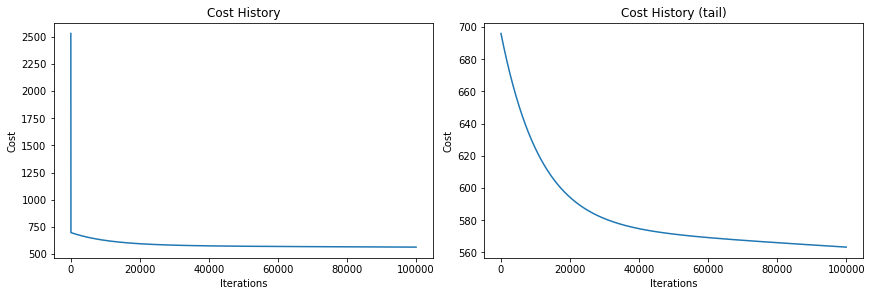

In [156]:
fig , (ax1, ax2) = plt.subplots(1,2,constrained_layout=True ,figsize=(12,4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost History"); ax2.set_title("Cost History (tail)")
ax1.set_ylabel("Cost");        ax2.set_ylabel("Cost");
ax1.set_xlabel("Iterations");  ax2.set_xlabel("Iterations")

## Appending vs. assigning in pre-defined array

In [44]:
def time_1(num):
    x = []
    for i in range(num):
        x.append(i)
    return x

In [45]:
def time_2(num):
    x = np.zeros(num,dtype=int)
    for i in range(num):
        x[i] = i
    return x

In [46]:
print(time_1(10))
print(time_2(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0 1 2 3 4 5 6 7 8 9]


In [47]:
%timeit time_1(10)
%timeit time_2(10)

611 ns ± 31.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.52 µs ± 46.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [48]:
%timeit time_1(1000)
%timeit time_2(1000)

40.8 µs ± 558 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
55 µs ± 704 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [49]:
%timeit time_1(100000)
%timeit time_2(100000)

4.12 ms ± 80.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.44 ms ± 40.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [51]:
%timeit time_1(1000000)
%timeit time_2(1000000)

59.5 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
56.9 ms ± 2.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [53]:
import sys
print(sys.getsizeof(time_1(1000000)))
print(sys.getsizeof(time_2(1000000)))

8697456
4000096
